In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
#pip install plotly

In [3]:
def Regulurized_delta_fun(data,h):
    x=data
    dh=np.zeros(len(x))
    dh[np.where(x[np.where(x<=0)]>-h)]=(1/(h**2))*(h+x[np.where(x[np.where(x<=0)]>-h)])
    dh[np.where(0<x)[0][np.where(x[np.where(0<x)]<h)]]=(1/(h**2))*(h-x[np.where(0<x)[0][np.where(x[np.where(0<x)]<h)]])
    return dh

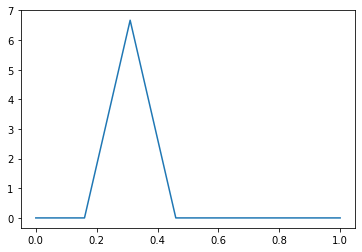

In [4]:
N=100
h=0.15
x=np.linspace(0,1,N+1)
y=Regulurized_delta_fun(x-0.31,h)
plt.plot(x,y)

In [5]:
def Thomas_algorithm(A,F,m):
    
    c=A.diagonal(1)
    b=A.diagonal()
    a=A.diagonal(-1)
    c_prime=np.zeros(len(c))
    d_prime=np.zeros(len(b))
    u=np.zeros(m-1)
    
    c_prime[0]=c[0]/b[0]
    for i in range(1,m-2):
        c_prime[i]=c[i]/(b[i]-a[i]*c_prime[i-1])
    
    d_prime[0]=F[0]/b[0]
    
    for i in range(1,m-1):
        d_prime[i]=(F[i]-a[i-1]*d_prime[i-1])/(b[i]-a[i-1]*c_prime[i-1])
    
    u[-1]=d_prime[-1]
    for i in range(1,m-1):
        u[m-2-i]=d_prime[m-2-i]-c_prime[m-2-i]*u[m-2-i+1]
    
    return u

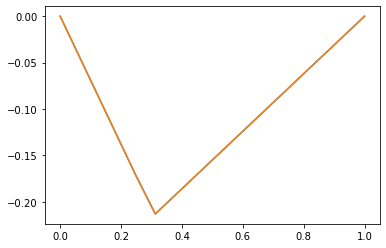

In [6]:
m=16
h=1/(m)
x_bar=0.31
x=np.linspace(0,1,m+1)
A=(np.eye(m-1,k=1)-2*np.eye(m-1)+np.eye(m-1,k=-1))*(1/h)**2
F=Regulurized_delta_fun(x[1:m]-x_bar,h)
u=Thomas_algorithm(A,F,m)
y=(x-1)*x_bar
y[np.where(x<=x_bar)]=(x_bar-1)*x[np.where(x<=x_bar)]

plt.plot(x,np.hstack([0,u,0]))
plt.plot(x,y)

In [7]:
def solvePoisson_with_delta_fun(m,x_bar):
    h=1/(m)
    x=np.linspace(0,1,m+1)
    A=(np.eye(m-1,k=1)-2*np.eye(m-1)+np.eye(m-1,k=-1))*(1/h)**2
    F=Regulurized_delta_fun(x[1:m]-x_bar,h)
    u=Thomas_algorithm(A,F,m)
    
    return u

5.551115123125783e-17

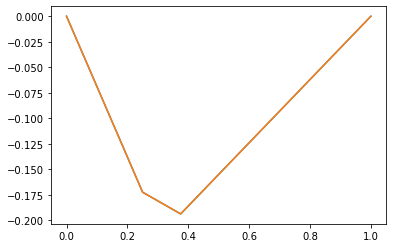

In [8]:
m=8
x_bar=0.31
u=solvePoisson_with_delta_fun(m,x_bar)
x=np.linspace(0,1,m+1)
exact=(x-1)*x_bar
exact[np.where(x<=x_bar)]=(x_bar-1)*x[np.where(x<=x_bar)]
u=np.hstack([0,u,0])
plt.plot(x,u)
plt.plot(x,exact)      
np.linalg.norm((u-exact),np.inf)

In [9]:
def show_result1(x_bar,start,n):
    Error=np.zeros(n)
    h=np.zeros(n)
    Ratio=np.zeros(n)
    Ratio[0]=0
    for index in range(start,start+n):
        m=2**(index)
        h[index-start]=1/m
        u=solvePoisson_with_delta_fun(m,x_bar)
        u=np.hstack([0,u,0])
        x=np.linspace(0,1,m+1)
        exact=(x-1)*x_bar
        exact[np.where(x<=x_bar)]=(x_bar-1)*x[np.where(x<=x_bar)]
        err=np.linalg.norm((u-exact),np.inf)
        Error[index-start]=err
    Ratio[1:]=np.log2(Error[0:n-1]/Error[1:])
    plt.plot(np.log2(h),np.log2(Error),label='result')
    plt.plot(np.log2(h),0*np.log2(h),label='slope=0')
    plt.xlabel('log2(h)')
    plt.ylabel('log2(Err)')
    plt.legend()
    fig=go.Figure(data=[go.Table(header=dict(values=['mesh width','Error', 'Ratio'])
                                 ,cells=dict(values=[h,Error,Ratio]))])
    return Error,Ratio,fig

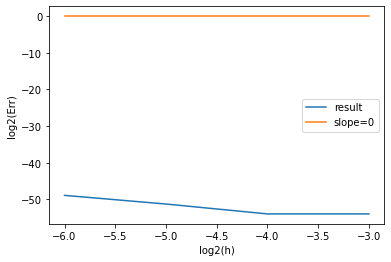

In [10]:
[Err,Rati,fig]=show_result1(0.31,3,4)

In [12]:
fig.show()

In [13]:
def gauss(A):
    m = len(A)
    n = m + 1
    
    for k in range(m):
        pivots = [abs(A[i][k]) for i in range(k, m)]
        i_max = pivots.index(max(pivots)) + k
        A[k], A[i_max] = A[i_max], A[k]
        for i in range(k + 1, m):
            f = A[i][k] / A[k][k]
            for j in range(k + 1, n):
                A[i][j] -= A[k][j] * f
        A[i][k] = 0
    return A

In [14]:
def solvePoisson_with_NB(m,alpha,beta,xb):
    h=1/(m)
    x=np.linspace(0,1,m+1)
    As=(np.eye(m+1,k=1)-2*np.eye(m+1)+np.eye(m+1,k=-1))
    a0=np.zeros(m+1)
    am=np.zeros(m+1)
    a0[0:2]=[-h,h]
    am[-1]=-h
    am[-2]=h
    As[0]=a0
    As[m]=am
    Ah=(1/(h**2))*As
    F=-((np.pi)**2)*np.sin(np.pi*x)
    F[0]=alpha+(h/2)*F[0]
    F[m]=-beta+(h/2)*F[m]
    Ag=np.hstack([Ah,F.reshape([len(F),1])])
    A=Ag
    A=gauss(A)
    [A1,b]=np.hsplit(A,[len(A)])
    u=np.zeros(m+1)
    u[-1]=xb
    for i in range(m):
        u[m-1-i]=(b[m-1-i]-np.dot(A1[m-1-i][m-1-i+1:],u[m-i:]))/A1[m-1-i,m-1-i]
    return u

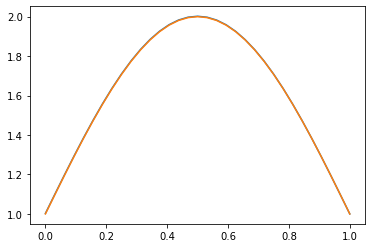

In [15]:
m=32
u=solvePoisson_with_NB(m,np.pi,-np.pi,1)
x=np.linspace(0,1,m+1)
plt.plot(x,u)
plt.plot(x,np.sin(np.pi*x)+1)

In [16]:
def show_result2(alpha,beta,xb,start,n):
    Error=np.zeros(n)
    h=np.zeros(n)
    Ratio=np.zeros(n)
    Ratio[0]=0
    for index in range(start,start+n):
        m=2**(index)
        h[index-start]=1/m
        u=solvePoisson_with_NB(m,alpha,beta,xb)
        
        x=np.linspace(0,1,m+1)
        exact=np.sin(np.pi*x)+xb
        err=np.linalg.norm((u-exact),np.inf)    
        Error[index-start]=err
    
    Ratio[1:]=np.log2(Error[0:n-1]/Error[1:])
    plt.plot(np.log2(h),np.log2(Error),label='result')
    plt.plot(np.log2(h),2*np.log2(h),label='slope=2')
    plt.xlabel('log2(h)')
    plt.ylabel('log2(Err)')
    plt.legend()
    fig=go.Figure(data=[go.Table(header=dict(values=['mesh width','Error', 'Ratio'])
                                 ,cells=dict(values=[h,Error,Ratio]))])
    return Error,Ratio,fig

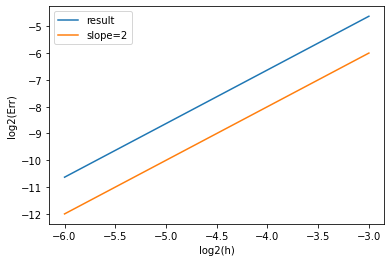

In [17]:
[Err,Rati,fig]=show_result2(np.pi,-np.pi,0,3,4)

In [18]:
fig.show()

In [19]:
Err

array([0.04047691, 0.01009968, 0.0025237 , 0.00063085])

In [20]:
def solvePoisson_with_NB_method2(m,alpha,beta,xb):
    h=1/(m)
    x=np.linspace(0,1,m+1)
    As=(np.eye(m+1,k=1)-2*np.eye(m+1)+np.eye(m+1,k=-1))
    a0=np.zeros(m+1)
    am=np.zeros(m+1)
    a0[0:2]=[-1,1]
    am[-1]=-1
    am[-2]=1
    As[0]=a0
    As[m]=am
    Ah=(1/(h**2))*As
    
    F=-1*((np.pi)**2)*np.sin(np.pi*x)
    F[0]=(F[0]/2)+alpha/(h)
    F[m]=(F[m]/2)-beta/(h)
    
    Ag=np.hstack([Ah,F.reshape([len(F),1])])
    A=Ag
    A=gauss(A)
    [A1,b]=np.hsplit(A,[len(A)])
    u=np.zeros(m+1)
    u[-1]=xb
    for i in range(m):
        u[m-1-i]=(b[m-1-i]-np.dot(A1[m-1-i][m-1-i+1:],u[m-i:]))/A1[m-1-i,m-1-i]
    return u

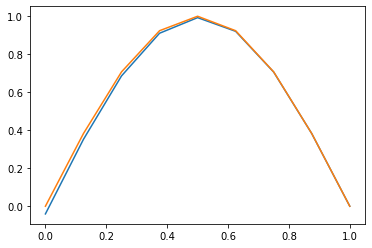

In [21]:
m=8
x=np.linspace(0,1,m+1)
u=solvePoisson_with_NB_method2(m,np.pi,-np.pi,0)
plt.plot(x,u)
plt.plot(x,np.sin(np.pi*x))

In [22]:
def show_result3(alpha,beta,xb,start,n):
    Error=np.zeros(n)
    h=np.zeros(n)
    Ratio=np.zeros(n)
    Ratio[0]=0
    for index in range(start,start+n):
        m=2**(index)
        h[index-start]=1/m
        u=solvePoisson_with_NB_method2(m,alpha,beta,xb)
        x=np.linspace(0,1,m+1)
        exact=np.sin(np.pi*x)+xb
        err=np.linalg.norm((u-exact),np.inf)
        Error[index-start]=err
        
    Ratio[1:]=np.log2(Error[0:n-1]/Error[1:])
    plt.plot(np.log2(h),np.log2(Error),label='result')
    plt.plot(np.log2(h),2*np.log2(h),label='slope=2')
    plt.xlabel('log2(h)')
    plt.ylabel('log2(Err)')
    plt.legend()
    fig=go.Figure(data=[go.Table(header=dict(values=['mesh width','Error', 'Ratio'])
                                 ,cells=dict(values=[h,Error,Ratio]))])
    return Error,Ratio,fig

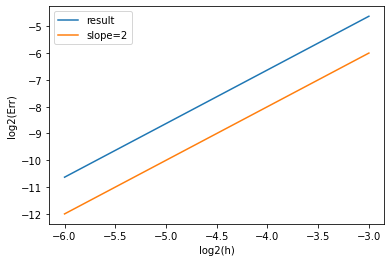

In [23]:
[Err,Rati,fig]=show_result3(np.pi,-np.pi,0,3,4)

In [25]:
fig.show()